In [2]:
# 변수에 데이터 저장
import pandas as pd

train = pd.read_csv('funda_train.csv')
submission = pd.read_csv('submission.csv')

In [4]:
display(train.head())

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0.0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0.0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0.0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0.0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0.0,NaN,기타 미용업,2000.000000


In [5]:
train.shape

(16723, 9)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16723 entries, 0 to 16722
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          16723 non-null  int64  
 1   card_id           16723 non-null  int64  
 2   card_company      16723 non-null  object 
 3   transacted_date   16723 non-null  object 
 4   transacted_time   16723 non-null  object 
 5   installment_term  16722 non-null  float64
 6   region            5917 non-null   object 
 7   type_of_business  6439 non-null   object 
 8   amount            16722 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [8]:
train.nunique()

store_id                6
card_id             10002
card_company            8
transacted_date       996
transacted_time       848
installment_term        8
region                  2
type_of_business        2
amount                373
dtype: int64

In [10]:
train[train['amount'] < 0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2.0,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0.0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0.0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0.0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0.0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...,...
16348,5,16163,b,2018-08-31,18:07,0.0,NaN,의복 액세서리 및 모조 장신구 도매업,-142.857143
16559,5,16301,e,2019-01-11,14:50,0.0,NaN,의복 액세서리 및 모조 장신구 도매업,-2857.142857
16636,6,16461,a,2016-08-19,18:39,0.0,충북 충주시,NaN,-3000.000000
16646,6,16470,c,2016-08-20,19:40,0.0,충북 충주시,NaN,-928.571429


In [11]:
!pip install rpy2
!pip install tzlocal

In [14]:
!pip install pandas==0.25.1
!pip install numpy==1.19.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 64.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 54.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyp

In [17]:
!pip install pmdarima
!pip install statsmodels
!pip install seaborn
!pip install tqdm

In [18]:
# 데이터 전처리
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

train = pd.read_csv('funda_train.csv')
display(train.head())

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'store_id'),
  Text(1, 0, 'card_id'),
  Text(2, 0, 'card_company'),
  Text(3, 0, 'transacted_date'),
  Text(4, 0, 'transacted_time'),
  Text(5, 0, 'installment_term'),
  Text(6, 0, 'region'),
  Text(7, 0, 'type_of_business'),
  Text(8, 0, 'amount')])

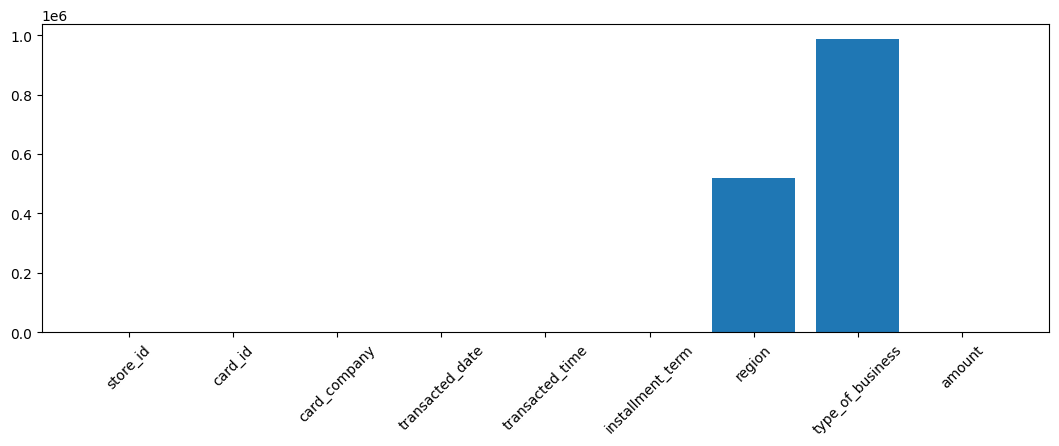

In [19]:
# 결측치 존재
# 시각화
plt.figure(figsize = (13, 4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation = 45)

In [20]:
# region과 type_of_business 속성은 절반 이상이 결측치 존재
# 범주형 속성이고 대치할 방법도 없음 => 열 전체 제거
train = train.drop(['region', 'type_of_business'], axis = 1)
display(train.head())

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0,1857.142857
1,0,1,h,2016-06-01,18:12,0,857.142857
2,0,2,c,2016-06-01,18:52,0,2000.000000
3,0,3,a,2016-06-01,20:22,0,7857.142857
4,0,4,c,2016-06-02,11:06,0,2000.000000


<Axes: >

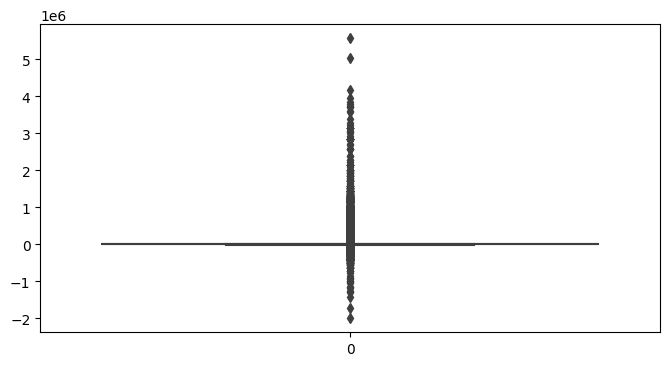

In [23]:
# amount 이상치 확인
plt.figure(figsize = (8, 4))
sns.boxplot(train['amount'])

In [24]:
# amount 변수에 음수 존재 => 환불
# 환불 발생 현황 확인
display(train[train['amount'] < 0].head())

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
41,0,40,a,2016-06-10,17:26,2,-8571.428571
347,0,285,a,2016-08-04,17:52,0,-1857.142857
731,0,473,g,2016-10-17,10:32,0,-2000.000000
831,0,230,b,2016-11-03,15:36,0,-85.714286
944,0,138,a,2016-11-28,13:21,0,-57.142857


In [36]:
# 환불 거래 제거
# 거래일과 거래시간을 합친 변수 생성
train['datetime'] = pd.to_datetime(train.transacted_date + ' ' + train.transacted_time, format = '%Y-%m-%d %H:%M:%S')

# 환불 거래를 제거하는 함수 정의
def remove_refund(df) :
  refund = df[df['amount'] < 0] # 매출액 음숫값 데이터 추출
  non_refund = df[df['amount'] > 0] # 매출액 양숫값 데이터 추출
  removed_date = pd.DataFrame()

  for i in tqdm(df.store_id.unique()) :
    divided_data = non_refund[non_refund['store_id'] == i] # 매출액이 양숫값인 데이터를 상점별로 나눔.
    divided_data2 = refund[refund['store_id'] == i] # 매출액이 음숫값인 데리터를 상점별로 나눔.

    for neg in divided_data2.to_records()[:] : # 환불 데이터 차례대로 검사
      refund_store = neg['store_id'] # 가게 아이디 추출
      refund_id = neg['card_id'] # 환불 카드 아이디 추출
      refund_datetime = neg['datetime'] # 환불 시간 추출
      refund_amount = neg['amount'] # 매출의 음숫값의 절댓값을 구함.

      # 환불 시간 이전의 데이터 중 카드 아이디와 환불액이 같은 후보 리스트 추출.
      refund_pay_list = divided_data[divided_data['datetime'] <= refund_datetime]
      refund_pay_list = refund_pay_list[refund_pay_list['card_id'] == refund_id]
      refund_pay_list = refund_pay_list[refund_pay_list['amount'] == refund_amount]

      # 후보 리스트가 있으면 카드 아이디, 환불액이 같으면서 가장 최근시간을 제거.
      if len(refund_pay_list) != 0 :
        refund_datetime = max(refund_pay_list['datetime']) # 가장 최근 시간 구함.
        noise_list = divided_data[divided_data['datetime'] == refund_datetime] # 가장 최근 시간.
        noise_list = noise_list[noise_list['card_id'] == refund_id] # 환불 카드 아이디
        noise_list = noise_list[noise_list['amount'] == refund_amount] # 환불액
        divided_data = divided_data.drop(index = noise_list.index) # 인덱스를 통해 제거

    removed_date = pd.concat([removed_date, divided_data], axis = 0) # 제거한 데이터를 데이터 프레임에 추가

  return removed_date

100%|██████████| 568/568 [00:49<00:00, 11.40it/s]


<Axes: >

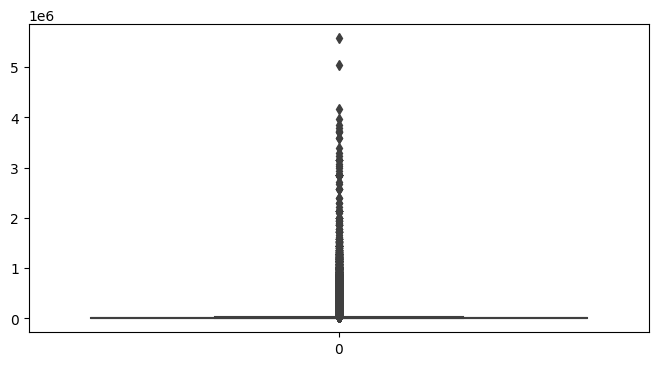

In [37]:
# 환불 거래 제거 함수를 통해 환불 거래 제거
positive_data = remove_refund(train)

# 시각화
plt.figure(figsize = (8, 4))
sns.boxplot(positive_data['amount'])